In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
import umap

In [2]:
df = pd.read_excel("Dry_Bean_Dataset.xlsx")
df = df.drop_duplicates()
X = df.iloc[:,:16]
y = df.iloc[:,16:]
y = y.reset_index().drop(columns = "index")
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
pt = PowerTransformer(method = "yeo-johnson")
X = pd.DataFrame(pt.fit_transform(X), columns = X.columns)

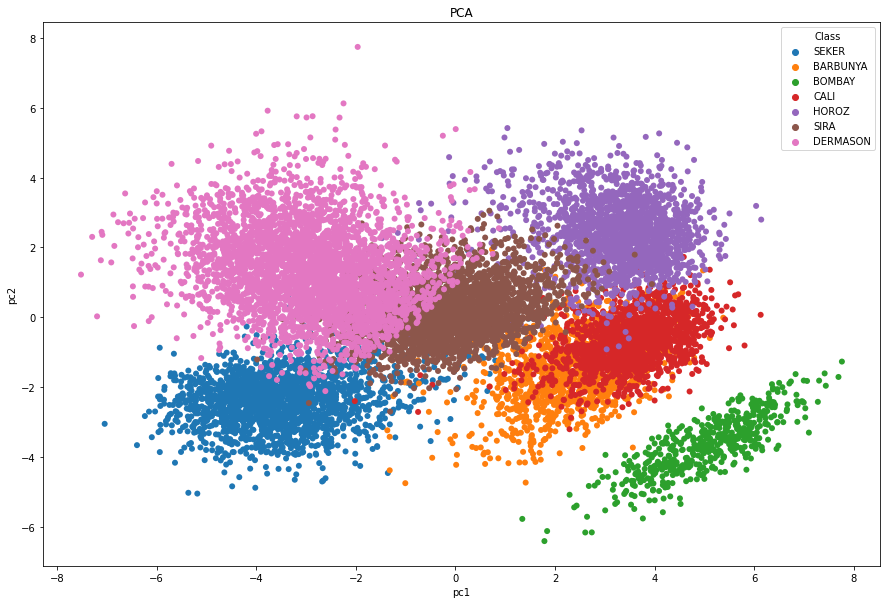

In [3]:
plt.figure(figsize = (15,10))
pca = PCA(n_components=2)
pc = pca.fit_transform(X)
pca_fit = pd.DataFrame(data = {"pc1":pc[:,0], "pc2":pc[:,1],"Class":np.ravel(y.values)})
plot = sns.scatterplot(x='pc1', y='pc2', data=pca_fit, hue='Class', ec=None).set(title='PCA')
plt.savefig("PCA.jpg", dpi = 600)
plt.show()

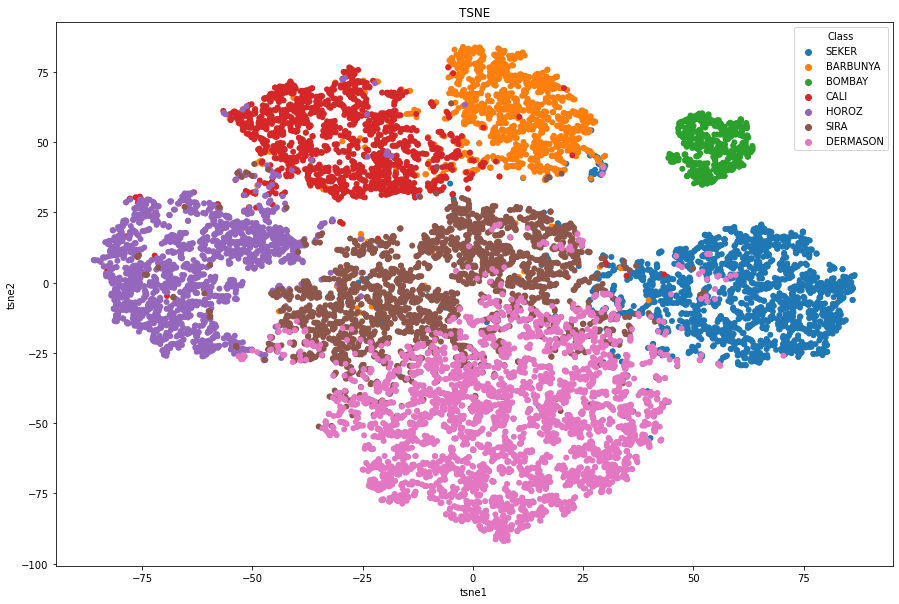

In [4]:
plt.figure(figsize = (15,10))
X_embedded = TSNE(n_components=2, n_jobs = -1, random_state = 101).fit_transform(X)
tsne_fit = pd.DataFrame(data = {"tsne1":X_embedded[:,0], "tsne2":X_embedded[:,1],"Class":np.ravel(y.values)})
plot = sns.scatterplot(x='tsne1', y='tsne2', data=tsne_fit, hue='Class', ec=None).set(title='TSNE')
plt.savefig("TSNE.jpg", dpi = 600)
plt.show()

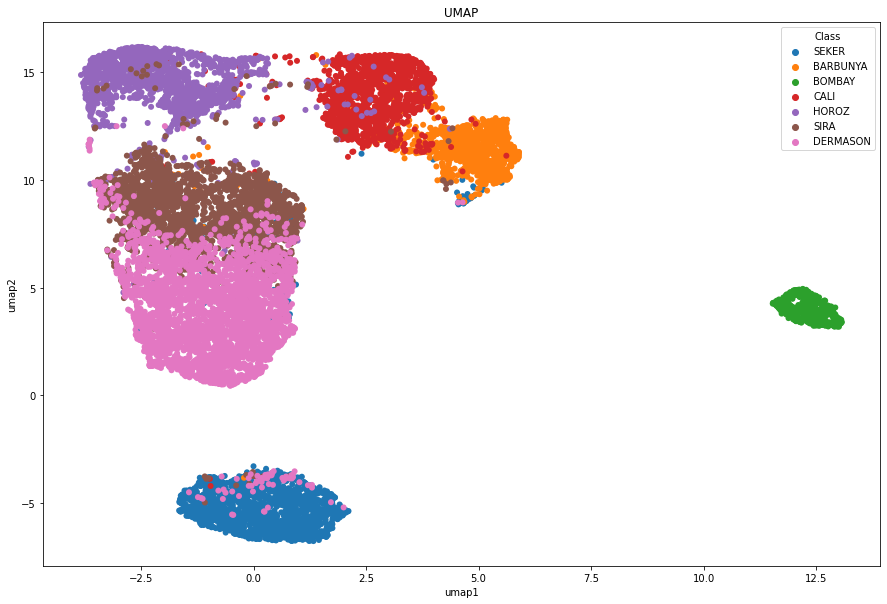

In [5]:
plt.figure(figsize = (15,10))
reducer = umap.UMAP(random_state = 101)
embedding = reducer.fit_transform(X)
umap_fit = pd.DataFrame(data = {"umap1":embedding[:,0], "umap2":embedding[:,1],"Class":np.ravel(y.values)})
plot = sns.scatterplot(x='umap1', y='umap2', data=umap_fit, hue='Class', ec=None).set(title='UMAP')
plt.savefig("UMAP.jpg", dpi = 600)
plt.show()